In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_daily = pd.read_csv('ASII_stock_combined.csv')
df_daily

,timestamp,open,low,high,close,volume
0,2019-01-01,8225,8225,8225,8225,0
1,2019-01-02,8200,8125,8275,8200,14014100
2,2019-01-03,8100,8100,8400,8375,25148400
3,2019-01-04,8400,8200,8450,8350,32475900
4,2019-01-07,8450,8150,8475,8150,32649700
...,...,...,...,...,...,...
1369,2024-06-07,4550,4530,4570,4560,34027900
1370,2024-06-10,4560,4500,4560,4510,19932200
1371,2024-06-12,4350,4290,4410,4360,65665400
1372,2024-06-13,4410,4400,4480,4460,55824400


In [3]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1374 non-null   object
 1   open       1374 non-null   int64 
 2   low        1374 non-null   int64 
 3   high       1374 non-null   int64 
 4   close      1374 non-null   int64 
 5   volume     1374 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 64.5+ KB


In [5]:
df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'])
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1374 non-null   datetime64[ns]
 1   open       1374 non-null   int64         
 2   low        1374 non-null   int64         
 3   high       1374 non-null   int64         
 4   close      1374 non-null   int64         
 5   volume     1374 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 64.5 KB


In [6]:
print(f'Describe of Each : \n Daily \n {df_daily.describe()}')

Describe of Each : 
 Daily 
                            timestamp         open          low         high  \
count                           1374  1374.000000  1374.000000  1374.000000   
mean   2021-08-25 14:59:12.838428160  6026.542940  5943.442504  6096.834061   
min              2019-01-01 00:00:00  3220.000000  3220.000000  3610.000000   
25%              2020-04-24 18:00:00  5350.000000  5256.250000  5425.000000   
50%              2021-08-18 12:00:00  5987.500000  5900.000000  6050.000000   
75%              2022-12-12 18:00:00  6750.000000  6650.000000  6800.000000   
max              2024-06-14 00:00:00  8475.000000  8350.000000  8550.000000   
std                              NaN   946.873599   945.453169   948.346043   

             close        volume  
count  1374.000000  1.374000e+03  
mean   6017.721980  4.505062e+07  
min    3280.000000  0.000000e+00  
25%    5325.000000  2.696758e+07  
50%    5975.000000  3.761780e+07  
75%    6750.000000  5.550488e+07  
max    8475.00

In [7]:
print(df_daily.isnull().sum())

timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64


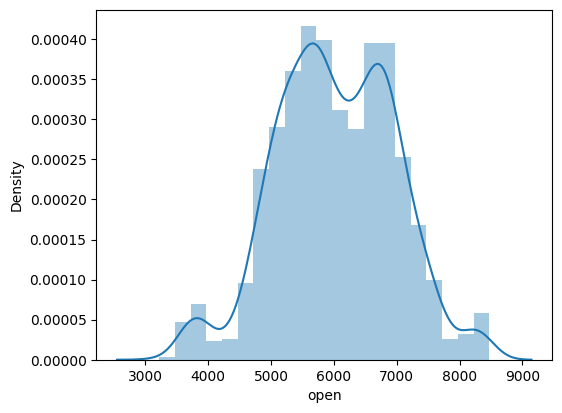

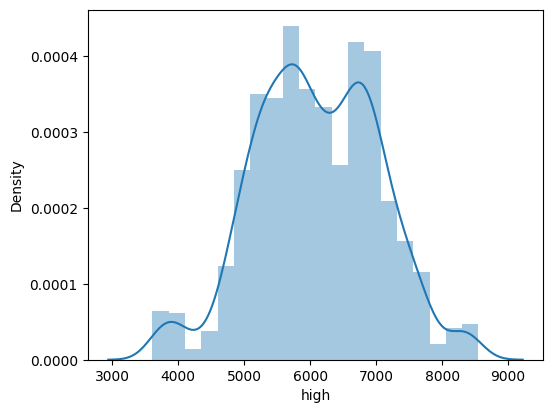

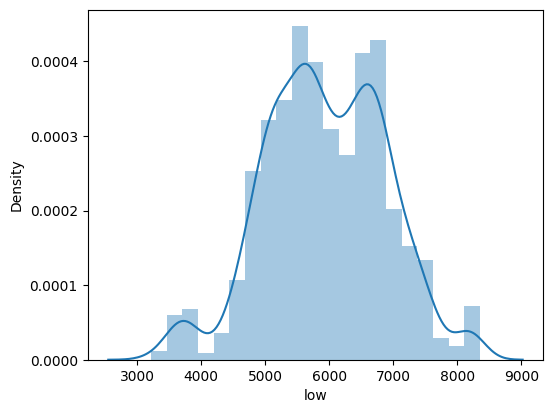

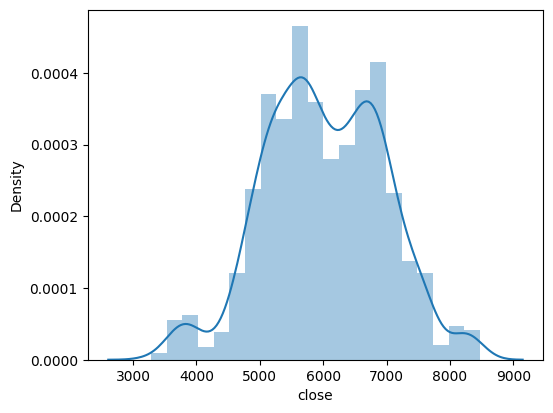

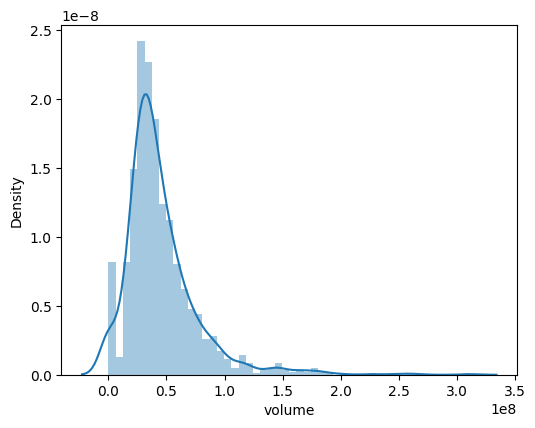

In [8]:
features = ['open', 'high', 'low', 'close', 'volume']

# plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplots(figsize=(20,10))
    plt.subplot(2,3,i+1)
    sns.distplot(df_daily[col])
    plt.show()

In [4]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df_daily['timestamp'],
                open=df_daily['open'],
                high=df_daily['high'],
                low=df_daily['low'],
                close=df_daily['close'])])

fig.show()

In [9]:
df = df_daily
df

,timestamp,open,low,high,close,volume
0,2019-01-01,8225,8225,8225,8225,0
1,2019-01-02,8200,8125,8275,8200,14014100
2,2019-01-03,8100,8100,8400,8375,25148400
3,2019-01-04,8400,8200,8450,8350,32475900
4,2019-01-07,8450,8150,8475,8150,32649700
...,...,...,...,...,...,...
1369,2024-06-07,4550,4530,4570,4560,34027900
1370,2024-06-10,4560,4500,4560,4510,19932200
1371,2024-06-12,4350,4290,4410,4360,65665400
1372,2024-06-13,4410,4400,4480,4460,55824400


In [10]:
df_daily.describe()

,timestamp,open,low,high,close,volume
count,1374,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03
mean,2021-08-25 14:59:12.838428160,6026.542940,5943.442504,6096.834061,6017.721980,4.505062e+07
min,2019-01-01 00:00:00,3220.000000,3220.000000,3610.000000,3280.000000,0.000000e+00
25%,2020-04-24 18:00:00,5350.000000,5256.250000,5425.000000,5325.000000,2.696758e+07
50%,2021-08-18 12:00:00,5987.500000,5900.000000,6050.000000,5975.000000,3.761780e+07
75%,2022-12-12 18:00:00,6750.000000,6650.000000,6800.000000,6750.000000,5.550488e+07
max,2024-06-14 00:00:00,8475.000000,8350.000000,8550.000000,8475.000000,3.114024e+08
std,NaN,946.873599,945.453169,948.346043,951.022534,3.211586e+07


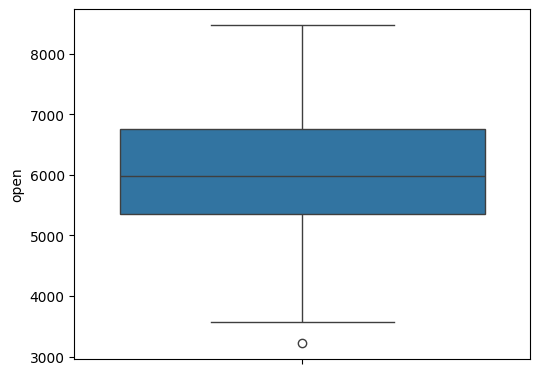

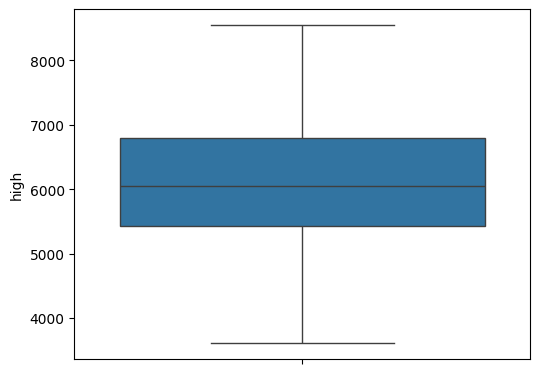

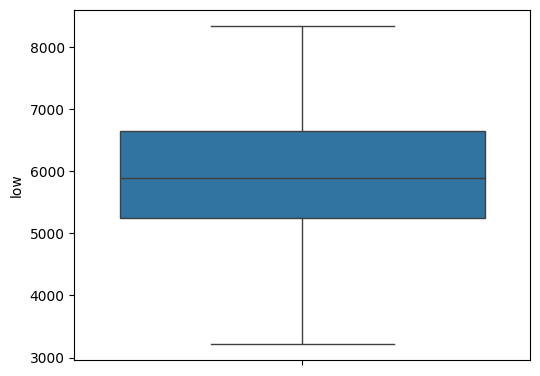

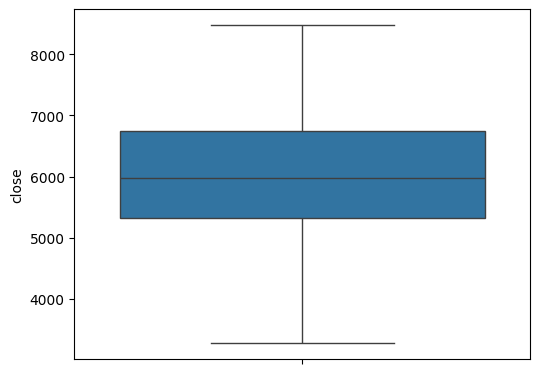

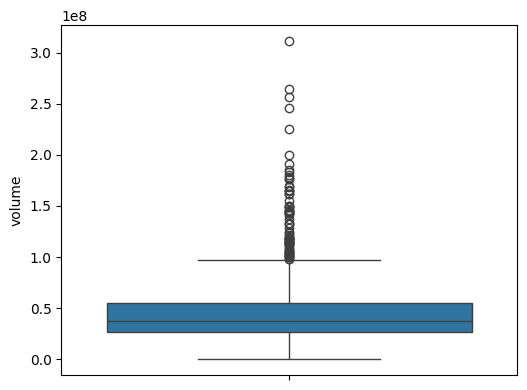

In [11]:
for i, col in enumerate(features):
    plt.subplots(figsize=(20,10))
    plt.subplot(2,3,i+1)
    sns.boxplot(df_daily[col])
    plt.show()

In [12]:
df['timestamp']

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-07
          ...    
1369   2024-06-07
1370   2024-06-10
1371   2024-06-12
1372   2024-06-13
1373   2024-06-14
Name: timestamp, Length: 1374, dtype: datetime64[ns]

# Feature Eng

In [13]:
# Create new columns
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df

,timestamp,open,low,high,close,volume,day,month,year
0,2019-01-01,8225,8225,8225,8225,0,1,1,2019
1,2019-01-02,8200,8125,8275,8200,14014100,2,1,2019
2,2019-01-03,8100,8100,8400,8375,25148400,3,1,2019
3,2019-01-04,8400,8200,8450,8350,32475900,4,1,2019
4,2019-01-07,8450,8150,8475,8150,32649700,7,1,2019
...,...,...,...,...,...,...,...,...,...
1369,2024-06-07,4550,4530,4570,4560,34027900,7,6,2024
1370,2024-06-10,4560,4500,4560,4510,19932200,10,6,2024
1371,2024-06-12,4350,4290,4410,4360,65665400,12,6,2024
1372,2024-06-13,4410,4400,4480,4460,55824400,13,6,2024


In [14]:
# menampilkan keterangan apakah harga tersebut berada di akhir kuartal atau tidak
# 1 = True
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,timestamp,open,low,high,close,volume,day,month,year,is_quarter_end
0,2019-01-01,8225,8225,8225,8225,0,1,1,2019,0
1,2019-01-02,8200,8125,8275,8200,14014100,2,1,2019,0
2,2019-01-03,8100,8100,8400,8375,25148400,3,1,2019,0
3,2019-01-04,8400,8200,8450,8350,32475900,4,1,2019,0
4,2019-01-07,8450,8150,8475,8150,32649700,7,1,2019,0


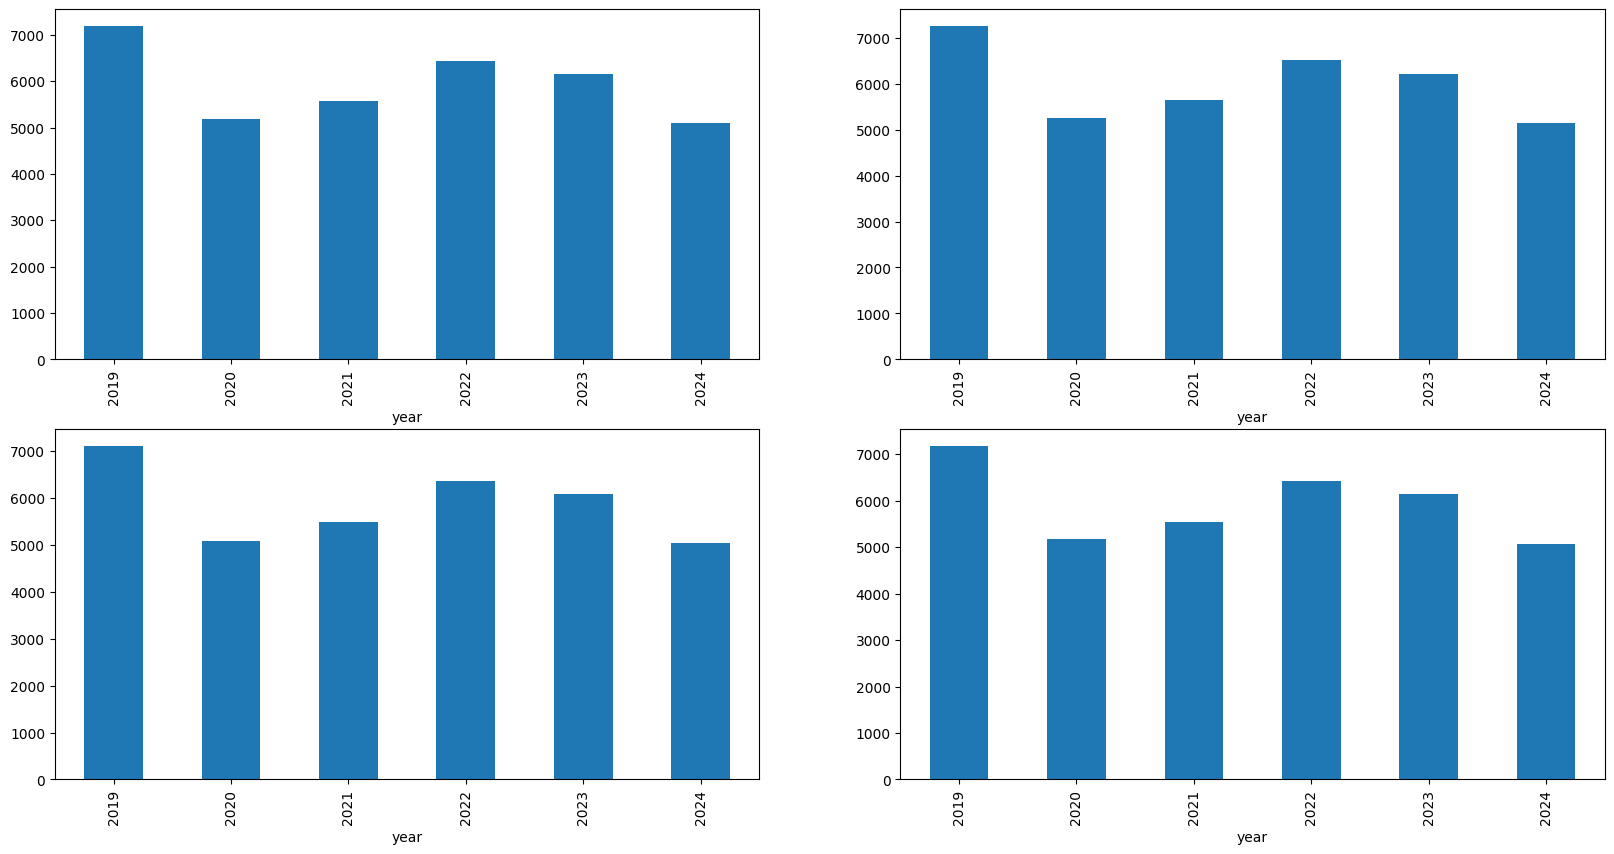

In [15]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [16]:
df.groupby('is_quarter_end').mean()

,timestamp,open,low,high,close,volume,day,month,year
is_quarter_end,,,,,,,,,
0,2021-08-17 05:20:31.270358272,6059.087948,5976.009772,6129.462541,6050.960912,4.516481e+07,15.791531,5.792617,2021.187839
1,2021-09-11 16:57:13.112582912,5960.375276,5877.229581,6030.496689,5950.143488,4.481845e+07,15.523179,7.284768,2021.134658


In [17]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)
df

,timestamp,open,low,high,close,volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2019-01-01,8225,8225,8225,8225,0,1,1,2019,0,0,0,0
1,2019-01-02,8200,8125,8275,8200,14014100,2,1,2019,0,0,-150,1
2,2019-01-03,8100,8100,8400,8375,25148400,3,1,2019,0,-275,-300,0
3,2019-01-04,8400,8200,8450,8350,32475900,4,1,2019,0,50,-250,0
4,2019-01-07,8450,8150,8475,8150,32649700,7,1,2019,0,300,-325,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,2024-06-07,4550,4530,4570,4560,34027900,7,6,2024,1,-10,-40,0
1370,2024-06-10,4560,4500,4560,4510,19932200,10,6,2024,1,50,-60,0
1371,2024-06-12,4350,4290,4410,4360,65665400,12,6,2024,1,-10,-120,1
1372,2024-06-13,4410,4400,4480,4460,55824400,13,6,2024,1,-50,-80,0


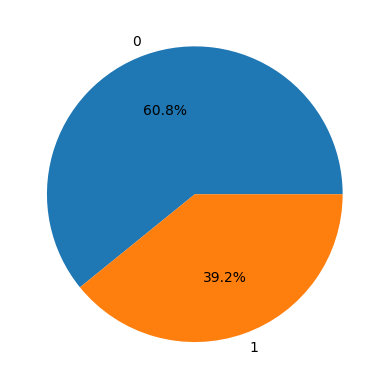

In [18]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

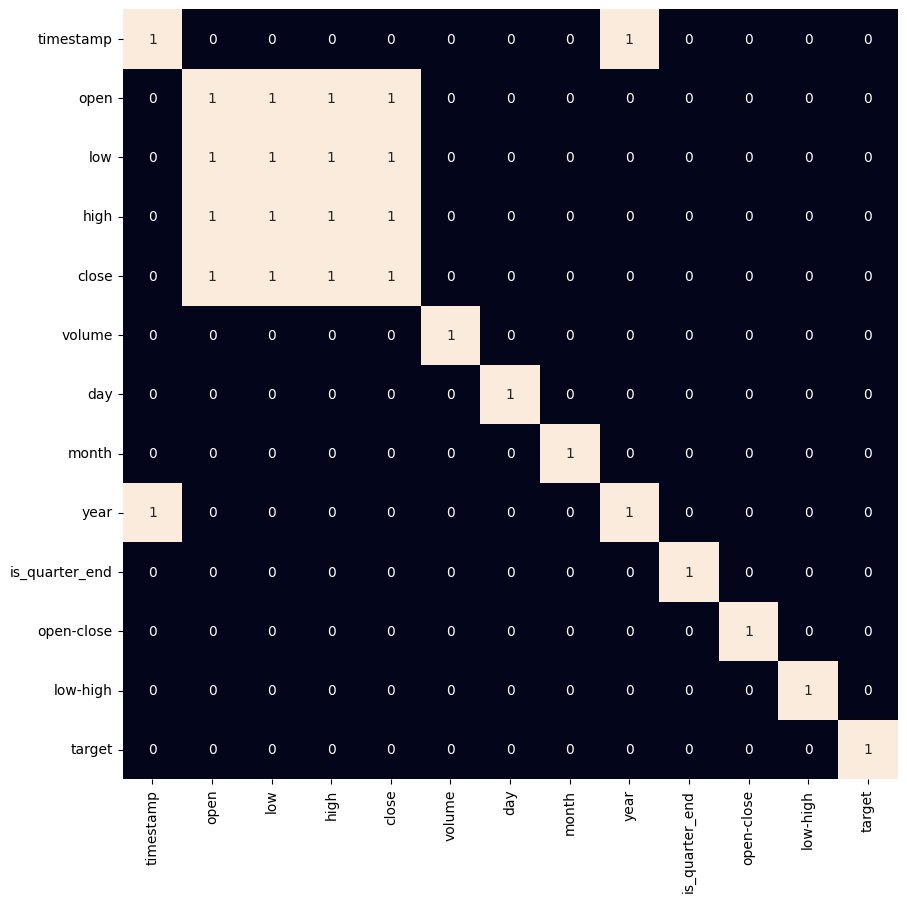

In [19]:
plt.figure(figsize=(10, 10))

# menampilkan hubungan korelasi antar kolom untuk menentukan fitur machine learning
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1236, 3) (138, 3)


In [21]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.7679040465095832
Validation Accuracy :  0.554673721340388



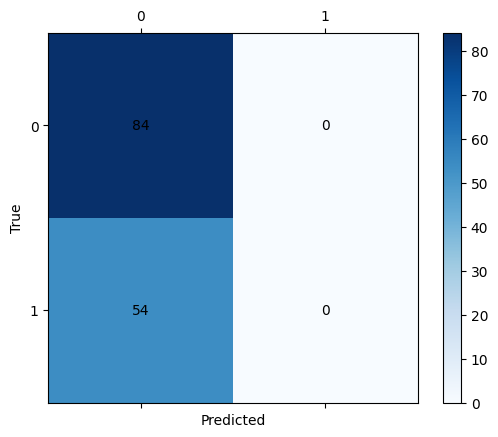

In [28]:
# Assuming models[0] is your trained model and X_valid, Y_valid are your validation data
Y_pred = models[0].predict(X_valid)
conf_mat = confusion_matrix(Y_valid, Y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar(cax)

# Adding the labels
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Dari hasil Training Accuracy dan Validation Accuracy menunjukan bahwa model mampu mengklasifikasikan data dengan baik atau mampu mengklasifikasikan data validasi sebanyak 66% dari keseluruhan data validasi yang digunakan dengan benar. Ini bisa menjadi indikasi bahwa model tersebut memiliki kinerja yang baik dalam mengklasifikasikan data baru yang sejenis dengan data yang digunakan untuk melatih model.